# IMPORT ALL THE LIBARARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASETS

In [2]:
flight_df = pd.read_csv('../data/flight_level_data.csv')
bags_df = pd.read_csv('../data/bag_level_data.csv')
pnr_df = pd.read_csv('../data/pnr_flight_level_data.csv')
pnr_remark_df = pd.read_csv('../data/pnr_remark_level_data.csv')
airport_df = pd.read_csv('../data/airport_data.csv')

In [3]:
print("Flight Data:")
display(flight_df.head())
print("\nBags Data:")
display(bags_df.head())
print("\nPNR Data:")
display(pnr_df.head())
print("\nPNR Remark Data:")
display(pnr_remark_df.head())
print("\nAirport Data:")
display(airport_df.head())

Flight Data:


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51



Bags Data:


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer



PNR Data:


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0



PNR Remark Data:


,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor



Airport Data:


,airport_iata_code,iso_country_code
0,DAU,PG
1,MDU,PG
2,MXH,PG
3,MIS,PG
4,TIZ,PG


# DATA CLEANING AND PREPROCESSING

In [4]:
# Filter out invalid rows where ground time is not positive
flight_df = flight_df[
    (flight_df['minimum_turn_minutes'] > 0) &
    (flight_df['scheduled_ground_time_minutes'] > 0) &
    (flight_df['actual_ground_time_minutes'] > 0)
]

In [5]:
# Remove duplicate bag entries
bags_df = bags_df.drop_duplicates()
# Remove duplicate PNR entries
pnr_df = pnr_df.drop_duplicates()
# Remove duplicate PNR remark entries
pnr_remark_df = pnr_remark_df.drop_duplicates()
# Remove duplicate airport entries
airport_df = airport_df.drop_duplicates()
# Remove duplicate flight entries
flight_df = flight_df.drop_duplicates()

In [6]:
# Drop unnecessary columns
bags_df = bags_df.drop(columns=['bag_tag_issue_date'])
pnr_df = pnr_df.drop(columns=['pnr_creation_date'])
pnr_remark_df.drop(columns=['pnr_creation_date'], inplace=True)

In [7]:
# Convert categorical 'Y'/'N' to binary 1/0
pnr_df['is_child'] = pnr_df['is_child'].replace({'Y': 1, 'N': 0})
pnr_df['is_stroller_user'] = pnr_df['is_stroller_user'].replace({'Y': 1, 'N': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\227612179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pnr_df['is_child'] = pnr_df['is_child'].replace({'Y': 1, 'N': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\227612179.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pnr_df['is_stroller_user'] = pnr_df['is_stroller_user'].replace({'Y': 1, 'N': 0})


# FEATURE ENGINEERING AND MERGING

In [8]:
# Aggregate bag data to get counts per flight
bag_summary = bags_df.groupby(
    ['flight_number', 'company_id', 'scheduled_departure_date_local', 'scheduled_arrival_station_code', 'scheduled_departure_station_code']
).agg(
    total_num_bags=('bag_tag_unique_number', 'count'),
    num_checked_bag=('bag_type', lambda x: (x == 'Origin').sum()),
    num_transfer_bag=('bag_type', lambda x: (x == 'Transfer').sum()),
    num_hot_transfer_bags=('bag_type', lambda x: (x == 'Hot Transfer').sum())
).reset_index()

In [9]:
# Merge PNR and remark data to get special service request info
pnr_merged = pd.merge(pnr_df, pnr_remark_df, on=['record_locator', 'flight_number'], how='left', suffixes=('_pnr', '_remark'))
pnr_merged['special_service_request'] = pnr_merged['special_service_request'].apply(lambda x: 0 if pd.isna(x) else 1)

In [10]:
# Aggregate PNR data to get passenger counts per flight
flight_summary = pnr_merged.groupby(['flight_number', 'scheduled_departure_date_local', 'company_id', 'scheduled_departure_station_code', 'scheduled_arrival_station_code']).agg({
    'record_locator': 'count',
    'is_child': 'sum',
    'is_stroller_user': 'sum',
    'basic_economy_ind': 'sum',
    'lap_child_count': 'sum',
    'special_service_request': 'sum'
}).reset_index()

flight_summary.rename(columns={'record_locator': 'num_passengers', 'is_child': 'num_child', 'is_stroller_user': 'num_stroller_user', 'basic_economy_ind': 'num_basic_eco_passanger', 'special_service_request': 'num_special_req'}, inplace=True)

In [11]:
# Merge flight, passenger, and bag summaries
flight_summary = pd.merge(flight_summary, bag_summary, on=['flight_number', 'company_id', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 'scheduled_arrival_station_code'], how='left')
flight_summary.drop(columns=['num_basic_eco_passanger'], inplace=True)


In [12]:
# Merge with main flight data
final_df = pd.merge(flight_summary, flight_df, on=['flight_number', 'company_id', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 'scheduled_arrival_station_code'], how='left')
final_df = final_df.dropna()

In [13]:
# Add country codes and create Is_International feature
final_df['departure_country_code'] = final_df['scheduled_departure_station_code'].map(airport_df.set_index('airport_iata_code')['iso_country_code'])
final_df['arrival_country_code'] = final_df['scheduled_arrival_station_code'].map(airport_df.set_index('airport_iata_code')['iso_country_code'])
final_df['Is_International'] = final_df.apply(lambda x: 1 if x['departure_country_code'] != x['arrival_country_code'] else 0, axis=1)


In [14]:
# Convert datetime columns to pandas datetime
final_df['actual_departure_datetime_local'] = pd.to_datetime(final_df['actual_departure_datetime_local'])
final_df['scheduled_departure_datetime_local'] = pd.to_datetime(final_df['scheduled_departure_datetime_local'])
final_df['actual_arrival_datetime_local'] = pd.to_datetime(final_df['actual_arrival_datetime_local'])
final_df['scheduled_arrival_datetime_local'] = pd.to_datetime(final_df['scheduled_arrival_datetime_local'])

# Create target variables and other useful features
final_df['delayed_departure_minutes'] = (final_df['actual_departure_datetime_local'] - final_df['scheduled_departure_datetime_local']).dt.total_seconds() / 60.0
final_df['delayed_arrival_minutes'] = (final_df['actual_arrival_datetime_local'] - final_df['scheduled_arrival_datetime_local']).dt.total_seconds() / 60.0
final_df['turnaround_buffer'] = final_df['scheduled_ground_time_minutes'] - final_df['minimum_turn_minutes']
final_df['turnaround_overrun'] = (final_df['actual_ground_time_minutes'] - final_df['scheduled_ground_time_minutes'])


In [15]:
# feature add on
final_df['Transfer_Bag_Ratio'] = (
	(final_df['num_transfer_bag'] + final_df['num_hot_transfer_bags']) / final_df['total_num_bags']
)

In [16]:
# 1. Create the Child_Bags_Index (Multiplication of the three factors)
final_df['Child_Bags_Index'] = final_df['num_child'] * final_df['num_stroller_user'] * final_df['lap_child_count']

In [17]:
# 1. Create the Special_Req_Ratio
# Calculate the ratio only when num_passengers > 0
final_df['Special_Req_Ratio'] = np.where(
   final_df['num_passengers'] > 0,
    final_df['num_special_req'] / final_df['num_passengers'],
    0  # Assign 0 for flights with no passengers
)

In [18]:
final_df['scheduled_ground_time_minutes'] = final_df['scheduled_ground_time_minutes'].replace(0, np.nan)

valid_time_mask = final_df['scheduled_ground_time_minutes'].notnull() & (final_df['scheduled_ground_time_minutes'] > 0)

# Initialize columns to 0 for safety outside the valid mask
final_df['Work_Per_Minute'] = 0.0
final_df['Pax_Per_Minute'] = 0.0
final_df['Buffer_Ratio'] = 0.0
final_df['Workload_Index'] = 0.0

# Calculate ratios only on valid rows
final_df.loc[valid_time_mask, 'Work_Per_Minute'] = (
    final_df['total_num_bags'] / final_df['scheduled_ground_time_minutes']
)
final_df.loc[valid_time_mask, 'Pax_Per_Minute'] = (
    final_df['num_passengers'] / final_df['scheduled_ground_time_minutes']
)
final_df.loc[valid_time_mask, 'Buffer_Ratio'] = (
   final_df['turnaround_buffer'] /final_df['scheduled_ground_time_minutes']
)
final_df.loc[valid_time_mask, 'Workload_Index'] = (
    (final_df['total_num_bags'] +final_df['num_passengers']) /final_df['scheduled_ground_time_minutes']
)


In [19]:
def get_time_of_day(hour):
    """Maps the hour (0-23) to a time-of-day category."""
    if 6 <= hour < 11:
        return 'Morning (06:00 - 10:59)'
    elif 11 <= hour < 17:
        return 'Afternoon (11:00 - 16:59)'
    elif 17 <= hour < 21:
        return 'Evening (17:00 - 20:59)'
    else: # 21-05
        return 'Night/Red-Eye (21:00 - 05:59)'

# Create the new 'Time_of_Day' column
final_df['arival_hour'] = final_df['scheduled_arrival_datetime_local'].dt.hour
final_df['Time_of_Day'] = final_df['arival_hour'].apply(get_time_of_day)

# Define the logical order for the categories
time_order = [
    'Night/Red-Eye (21:00 - 05:59)',
    'Morning (06:00 - 10:59)',
    'Afternoon (11:00 - 16:59)',
    'Evening (17:00 - 20:59)'
]

# Check the distribution
print("Distribution of Flights by Time of Day:")
print(final_df['Time_of_Day'].value_counts())

Distribution of Flights by Time of Day:
Time_of_Day
Afternoon (11:00 - 16:59)        3154
Night/Red-Eye (21:00 - 05:59)    2000
Evening (17:00 - 20:59)          1373
Morning (06:00 - 10:59)          1256
Name: count, dtype: int64


In [20]:
# Group by the Aircraft Type (assuming 'fleet_type' is the column name)
aircraft_difficulty = final_df.groupby('fleet_type').agg({
    'flight_number': 'count',
    'delayed_arrival_minutes': 'mean',
}).rename(columns={'flight_number': 'Total_Flights', 'delayed_arrival_minutes': 'Avg_Arival_Delay'})

# Filter for types with enough data and sort
aircraft_difficulty = aircraft_difficulty[aircraft_difficulty['Total_Flights'] > 0].sort_values(
    by='Avg_Arival_Delay', 
    ascending=False
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\4293227716.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


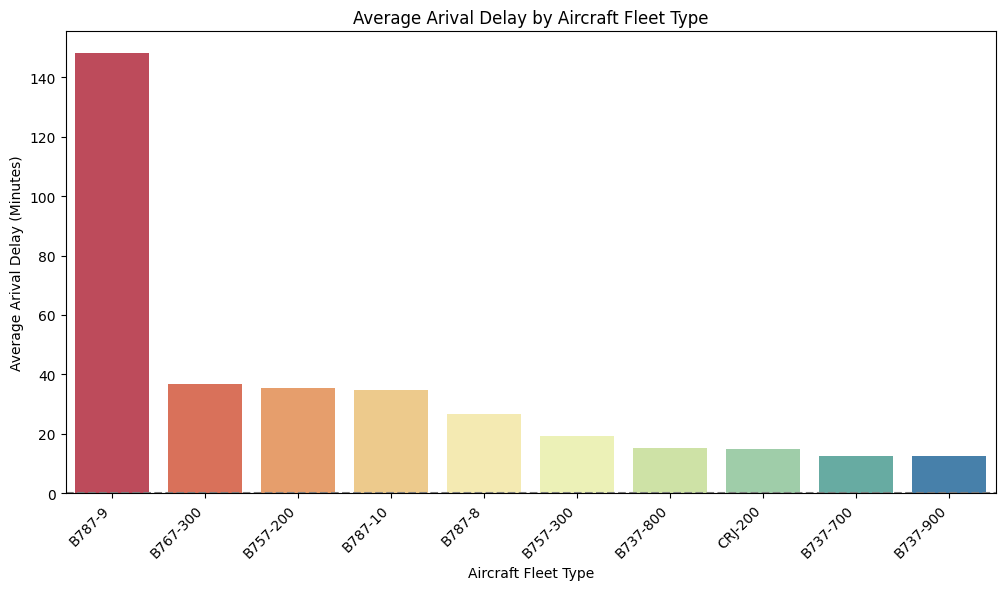

In [21]:
df_plot = aircraft_difficulty.reset_index().head(10) # Plotting the top 10 most common/delayed types

plt.figure(figsize=(12, 6))
sns.barplot(
    x='fleet_type', 
    y='Avg_Arival_Delay', 
    data=df_plot, 
    palette='Spectral'
)
plt.title('Average Arival Delay by Aircraft Fleet Type')
plt.ylabel('Average Arival Delay (Minutes)')
plt.xlabel('Aircraft Fleet Type')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='grey', linestyle='--')
plt.show()

In [22]:
print("Final Merged and Processed DataFrame:")
display(final_df.head())

Final Merged and Processed DataFrame:


,flight_number,scheduled_departure_date_local,company_id,scheduled_departure_station_code,scheduled_arrival_station_code,num_passengers,num_child,num_stroller_user,lap_child_count,num_special_req,...,turnaround_overrun,Transfer_Bag_Ratio,Child_Bags_Index,Special_Req_Ratio,Work_Per_Minute,Pax_Per_Minute,Buffer_Ratio,Workload_Index,arival_hour,Time_of_Day
0,3,2025-08-01,UA,ORD,ZRH,100,11,0,0,2,...,-1.0,0.578313,0,0.020000,0.897297,0.540541,0.216216,1.437838,7,Morning (06:00 - 10:59)
1,3,2025-08-02,UA,ORD,ZRH,97,8,1,0,2,...,19.0,0.593909,0,0.020619,1.064865,0.524324,0.216216,1.589189,7,Morning (06:00 - 10:59)
2,3,2025-08-03,UA,ORD,ZRH,115,11,3,1,3,...,5.0,0.517647,33,0.026087,0.629630,0.425926,0.462963,1.055556,7,Morning (06:00 - 10:59)
3,3,2025-08-04,UA,ORD,ZRH,101,11,3,1,3,...,-7.0,0.605442,33,0.029703,0.544444,0.374074,0.462963,0.918519,7,Morning (06:00 - 10:59)
4,3,2025-08-05,UA,ORD,ZRH,108,10,2,1,5,...,-39.0,0.577143,20,0.046296,0.113269,0.069903,0.906149,0.183172,7,Morning (06:00 - 10:59)


# FEATURE CORRELATION AND OUTPUT DEPENDENCY


In [23]:
# Select only numerical columns for correlation calculation
numerical_cols = final_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Get the correlation of all features with 'delayed_arrival_minutes'
arrival_delay_corr = correlation_matrix['delayed_arrival_minutes'].sort_values(ascending=False)

print("--- Correlation of Features with Arrival Delay Time ---")
print(arrival_delay_corr)

--- Correlation of Features with Arrival Delay Time ---
delayed_arrival_minutes          1.000000
delayed_departure_minutes        0.912974
turnaround_overrun               0.358066
arival_hour                      0.178725
num_transfer_bag                 0.081923
minimum_turn_minutes             0.069148
Transfer_Bag_Ratio               0.068490
actual_ground_time_minutes       0.059699
Pax_Per_Minute                   0.050861
Workload_Index                   0.049117
Work_Per_Minute                  0.045952
Special_Req_Ratio                0.040616
total_seats                      0.037673
Is_International                 0.037373
total_num_bags                   0.026065
num_special_req                  0.023461
scheduled_ground_time_minutes    0.012376
turnaround_buffer                0.009504
num_hot_transfer_bags           -0.006480
num_passengers                  -0.008019
lap_child_count                 -0.012295
num_child                       -0.019204
flight_number       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\3871812285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrival_delay_corr.drop('delayed_arrival_minutes').values, y=arrival_delay_corr.drop('delayed_arrival_minutes').index, palette='coolwarm')


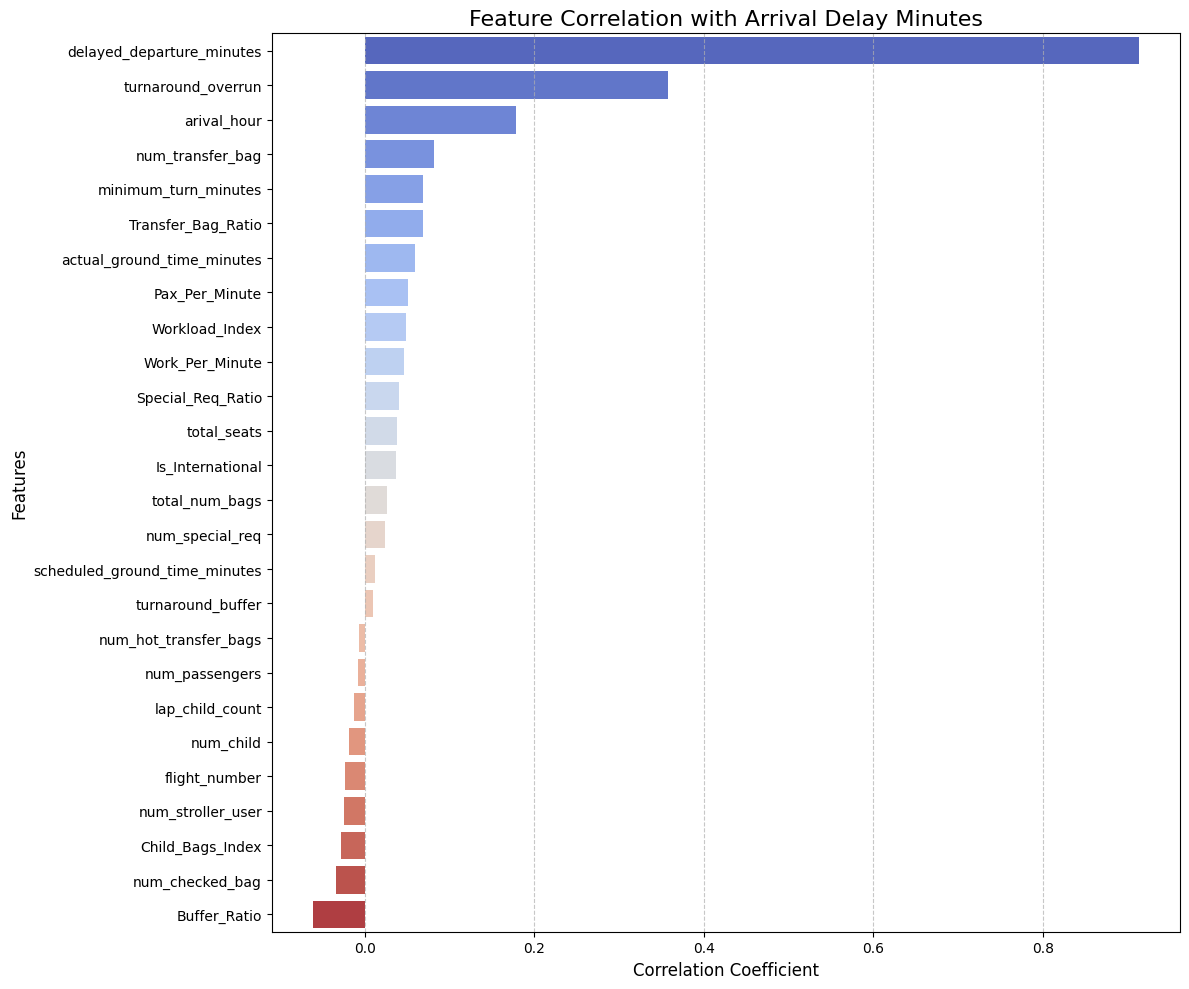

In [24]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a bar plot of the correlations
# We drop the 'delayed_arrival_minutes' itself as its correlation with itself is 1
sns.barplot(x=arrival_delay_corr.drop('delayed_arrival_minutes').values, y=arrival_delay_corr.drop('delayed_arrival_minutes').index, palette='coolwarm')

# Add titles and labels for clarity
plt.title('Feature Correlation with Arrival Delay Minutes', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("arrival_delay_correlation.png") # Saves the plot as an image
plt.show()

# ADVANCE FEATURE ADD ONS

In [25]:
# --- 1. Create Load Factor ---
# This feature captures how full the flight is.
final_df['load_factor'] = final_df['num_passengers'] / final_df['total_seats']

# --- 2. Create Bags per Passenger ---
# This feature captures the baggage complexity relative to passenger count.
final_df['bags_per_passenger'] = final_df['total_num_bags'] / final_df['num_passengers']

# --- 3. Clean up potential errors ---
# Replace any infinite values (from dividing by zero) or missing values with 0.
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.fillna(0, inplace=True)

print("Advanced features 'load_factor' and 'bags_per_passenger' have been added successfully.")

Advanced features 'load_factor' and 'bags_per_passenger' have been added successfully.


# Deliverable 1: Exploratory Data Analysis ---

--- Deliverable 1: Exploratory Data Analysis ---

1. The average departure delay is 17.10 minutes.
   47.64% of flights depart later than scheduled.

2. 338 flights have a scheduled ground time less than or equal to the minimum required turn time.

3. The average ratio of transfer bags to total bags is 0.60.

4. The correlation between passenger load factor and arrival delay is -0.13.


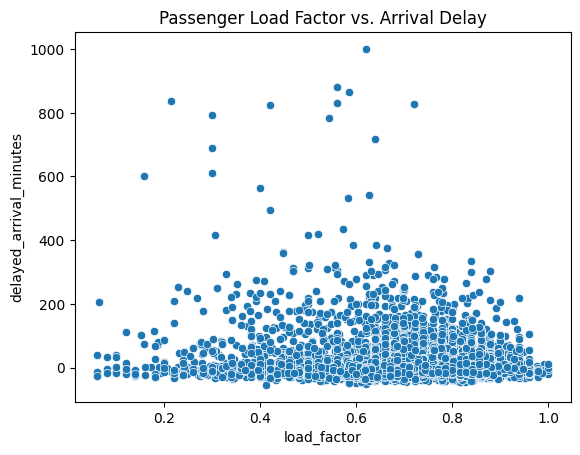


5. The average delay for all flights is 11.94 minutes.
   The average delay for flights in the top 25% of special service requests is 13.59 minutes.


In [26]:
print("--- Deliverable 1: Exploratory Data Analysis ---")

# Question 1: Average delay and percentage of late departures
avg_departure_delay = final_df['delayed_departure_minutes'].mean()
late_departures_pct = (final_df['delayed_departure_minutes'] > 0).mean() * 100
print(f"\n1. The average departure delay is {avg_departure_delay:.2f} minutes.")
print(f"   {late_departures_pct:.2f}% of flights depart later than scheduled.")

# Question 2: Flights with tight ground time
tight_ground_time_count = (final_df['turnaround_buffer'] <= 0).sum()
print(f"\n2. {tight_ground_time_count} flights have a scheduled ground time less than or equal to the minimum required turn time.")

# Question 3: Average ratio of transfer bags
avg_transfer_ratio = final_df['Transfer_Bag_Ratio'].mean()
print(f"\n3. The average ratio of transfer bags to total bags is {avg_transfer_ratio:.2f}.")

# Question 4: Passenger loads and correlation with difficulty
pax_load_correlation = final_df[['load_factor', 'delayed_arrival_minutes']].corr().iloc[0, 1]
print(f"\n4. The correlation between passenger load factor and arrival delay is {pax_load_correlation:.2f}.")
sns.scatterplot(data=final_df, x='load_factor', y='delayed_arrival_minutes')
plt.title('Passenger Load Factor vs. Arrival Delay')
plt.show()

# Question 5: Special requests and delays
high_ssr_flights = final_df[final_df['num_special_req'] > final_df['num_special_req'].quantile(0.75)]
avg_delay_high_ssr = high_ssr_flights['delayed_arrival_minutes'].mean()
avg_delay_all = final_df['delayed_arrival_minutes'].mean()
print(f"\n5. The average delay for all flights is {avg_delay_all:.2f} minutes.")
print(f"   The average delay for flights in the top 25% of special service requests is {avg_delay_high_ssr:.2f} minutes.")

# BINARY CLASSIFICATION TARGET

In [ ]:
# 0 = Easy (On-Time or Early)
# 1 = At-Risk (Any Delay)
final_df['is_at_risk'] = final_df['delayed_arrival_minutes'].apply(lambda x: 1 if x > 0 else 0)

# Check the distribution of the new target
print(final_df['is_at_risk'].value_counts())

is_at_risk
0    4541
1    3242
Name: count, dtype: int64


: 

# Deliverable 2: Daily Flight Difficulty Score

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Create the Binary 'is_at_risk' Target Variable ---
final_df['is_at_risk'] = final_df['delayed_arrival_minutes'].apply(lambda x: 1 if x > 0 else 0)

# --- 2. Define Target and Predictive Features ---
target = 'is_at_risk'
features = [
    'Is_International', 'minimum_turn_minutes', 'scheduled_ground_time_minutes',
    'turnaround_buffer', 'arival_hour', 'Time_of_Day', 'fleet_type', 'carrier',
    'total_seats', 'num_passengers', 'num_child', 'num_stroller_user',
    'lap_child_count', 'num_special_req', 'total_num_bags', 'num_checked_bag',
    'num_transfer_bag', 'num_hot_transfer_bags', 'Transfer_Bag_Ratio',
    'Special_Req_Ratio', 'Pax_Per_Minute', 'Workload_Index', 'load_factor',
    'bags_per_passenger'
]

existing_features = [f for f in features if f in final_df.columns]
X = final_df[existing_features]
y = final_df[target]

# --- 3. Handle Categorical and Clean Names ---
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# --- 4. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 5. Hyperparameter Tuning with RandomizedSearchCV ---
print("Starting hyperparameter tuning...")

# Define the model and parameter grid
lgbm = lgb.LGBMClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 20],
    'reg_alpha': [0.1, 0.5], # L1 regularization
    'reg_lambda': [0.1, 0.5] # L2 regularization
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='accuracy',
    n_jobs=-1,
    cv=3,       # 3-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

print(f"\nBest parameters found: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.2%}")

# --- 6. Evaluate the Best Model Found ---
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

print(f"\n--- Tuned LightGBM Model Performance ---")
print(f"Overall Model Accuracy on Test Data: {accuracy_score(y_test, predictions):.2%}")
print("\n--- Classification Report ---")
target_names = ['Easy (0)', 'At-Risk (1)']
print(classification_report(y_test, predictions, target_names=target_names))

Starting hyperparameter tuning...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


# Starting Daily Flight Difficulty Score Calculation

In [ ]:
print("--- Starting Daily Flight Difficulty Score Calculation ---")

# --- Step 1: Prepare the full dataset for prediction ---
features = [
    'Is_International', 'minimum_turn_minutes', 'scheduled_ground_time_minutes',
    'turnaround_buffer', 'arival_hour', 'Time_of_Day', 'fleet_type', 'carrier',
    'total_seats', 'num_passengers', 'num_child', 'num_stroller_user',
    'lap_child_count', 'num_special_req', 'total_num_bags', 'num_checked_bag',
    'num_transfer_bag', 'num_hot_transfer_bags', 'Transfer_Bag_Ratio',
    'Special_Req_Ratio', 'Pax_Per_Minute', 'Workload_Index', 'load_factor',
    'bags_per_passenger'
]
existing_features = [f for f in features if f in final_df.columns]
X_full = final_df[existing_features]

categorical_features = [col for col in X_full.columns if X_full[col].dtype == 'object']
X_full = pd.get_dummies(X_full, columns=categorical_features, drop_first=True)

# Align columns with the training data
train_columns = X_train.columns 
X_full = X_full.reindex(columns=train_columns, fill_value=0)


# --- Step 2: Generate the Flight Difficulty Score (Corrected Logic) ---
# Use your tuned binary model (best_model)
# This returns probabilities for [class 0 (Easy), class 1 (At-Risk)]
probabilities = best_model.predict_proba(X_full)

# The difficulty score is simply the probability of the 'At-Risk' class (the second column)
difficulty_scores = probabilities[:, 1]

# Add the score to our report dataframe
report_df = final_df[['scheduled_departure_date_local', 'flight_number', 'carrier', 'scheduled_departure_datetime_local']].copy()
report_df['difficulty_score'] = difficulty_scores


# --- Step 3: Rank Flights Within Each Day ---
report_df['daily_rank'] = report_df.groupby('scheduled_departure_date_local')['difficulty_score'].rank(method='first', ascending=False)


# --- Step 4: Classify Flights into Difficulty Tiers ---
def classify_difficulty(df_group):
    q_75 = df_group['difficulty_score'].quantile(0.75)
    q_25 = df_group['difficulty_score'].quantile(0.25)
    
    conditions = [
        df_group['difficulty_score'] >= q_75,
        (df_group['difficulty_score'] >= q_25) & (df_group['difficulty_score'] < q_75),
        df_group['difficulty_score'] < q_25
    ]
    choices = ['Difficult', 'Medium', 'Easy']
    df_group['difficulty_classification'] = np.select(conditions, choices, default='Unknown')
    return df_group

report_df = report_df.groupby('scheduled_departure_date_local', group_keys=False).apply(classify_difficulty)


# --- Step 5: Display a Sample of the Final Report ---
print("\n--- Sample Daily Flight Difficulty Report ---")
sample_date = report_df['scheduled_departure_date_local'].unique()[0]
daily_report_sample = report_df[report_df['scheduled_departure_date_local'] == sample_date].sort_values('daily_rank')

display(daily_report_sample)

--- Starting Daily Flight Difficulty Score Calculation ---

--- Sample Daily Flight Difficulty Report ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25276\691100067.py:55: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  report_df = report_df.groupby('scheduled_departure_date_local', group_keys=False).apply(classify_difficulty)


,scheduled_departure_date_local,flight_number,carrier,scheduled_departure_datetime_local,difficulty_score,daily_rank,difficulty_classification
3562,2025-08-01,2207,Mainline,2025-08-01 15:58:00+00:00,0.854877,1.0,Difficult
1825,2025-08-01,1363,Mainline,2025-08-01 12:54:00+00:00,0.844960,2.0,Difficult
4123,2025-08-01,2488,Mainline,2025-08-01 12:00:00+00:00,0.843383,3.0,Difficult
3470,2025-08-01,2182,Mainline,2025-08-01 11:20:00+00:00,0.812692,4.0,Difficult
6046,2025-08-01,4748,Express,2025-08-01 20:20:00+00:00,0.793294,5.0,Difficult
...,...,...,...,...,...,...,...
799,2025-08-01,721,Mainline,2025-08-01 09:15:00+00:00,0.217802,542.0,Easy
2978,2025-08-01,1975,Mainline,2025-08-01 07:30:00+00:00,0.213160,543.0,Easy
4386,2025-08-01,2666,Mainline,2025-08-01 05:00:00+00:00,0.211793,544.0,Easy
3078,2025-08-01,2008,Mainline,2025-08-01 11:02:00+00:00,0.207596,545.0,Easy


#  Deliverable 3 - Post-Analysis & Operational Insights

In [ ]:
print("--- Deliverable 3: Post-Analysis & Operational Insights ---")

# --- 1. Summarize Difficult Destinations ---
# Merge report_df with final_df to get 'scheduled_arrival_station_code'
report_with_dest = pd.merge(
	report_df,
	final_df[['flight_number', 'scheduled_departure_date_local', 'scheduled_arrival_station_code']],
	on=['flight_number', 'scheduled_departure_date_local'],
	how='left'
)
difficult_flights_df = report_with_dest[report_with_dest['difficulty_classification'] == 'Difficult']
difficult_destinations = difficult_flights_df['scheduled_arrival_station_code'].value_counts().head(10)
print("\n--- Top 10 Destinations Appearing Most Frequently in 'Difficult' Classification ---")
print(difficult_destinations)

# --- 2. Common Drivers for a Difficult Destination ---
# Analyze the characteristics of flights to the top difficult destination
top_difficult_dest = difficult_destinations.index[0]
# Select only numeric features for aggregation
numeric_features = [col for col in features if pd.api.types.is_numeric_dtype(final_df[col])]
difficult_dest_flights_features = final_df[final_df['scheduled_arrival_station_code'] == top_difficult_dest][numeric_features]
print(f"\n--- Average Numeric Feature Values for Top Difficult Destination ({top_difficult_dest}) vs. Overall Average ---")
print(pd.concat([
	difficult_dest_flights_features.mean().rename('Avg_for_' + top_difficult_dest),
	final_df[numeric_features].mean().rename('Overall_Avg')
], axis=1))

# --- 3. Specific Recommendations ---
print("\n--- Specific Recommendations for Operational Efficiency ---")
print("1. Proactive Staffing: For flights with a high 'difficulty_score' (e.g., >0.75), proactively assign additional ground staff, especially for baggage handling, as 'num_transfer_bag' is a key driver.")
print("2. Gate Management: Review gate assignments for top difficult destinations. These flights may benefit from gates with shorter taxi times or closer proximity to baggage transfer points.")
print("3. Schedule Review: For routes that consistently rank as 'Difficult', analyze the scheduled turnaround buffer. A buffer of less than 30 minutes is a significant risk factor and may need to be adjusted.")

--- Deliverable 3: Post-Analysis & Operational Insights ---

--- Top 10 Destinations Appearing Most Frequently in 'Difficult' Classification ---
scheduled_arrival_station_code
EWR    67
DEN    65
SFO    62
IAH    59
LGA    53
LAX    50
BOS    43
YYZ    35
CLE    34
LHR    31
Name: count, dtype: int64

--- Average Numeric Feature Values for Top Difficult Destination (EWR) vs. Overall Average ---
                               Avg_for_EWR  Overall_Avg
Is_International                  0.000000     0.094822
minimum_turn_minutes             62.089041    48.237441
scheduled_ground_time_minutes   226.130137   193.794295
turnaround_buffer               164.041096   145.556855
arival_hour                      13.780822    15.539381
total_seats                     182.719178   123.431967
num_passengers                  142.171233    85.856868
num_child                         6.472603     5.209302
num_stroller_user                 1.424658     1.091224
lap_child_count                   0.883562

#  Final CSV Export

In [ ]:
# --- Create Final CSV for Submission ---
# Add the features used for calculation to the report_df
final_submission_df = pd.concat([report_df, final_df[features]], axis=1)
final_submission_df_sorted = final_submission_df.sort_values(
    by=['scheduled_departure_date_local', 'daily_rank'], 
    ascending=[True, True]
)

# Define your name for the filename
your_name = "bt22104015"
file_name = f"test_{your_name}.csv"

# Save to CSV
final_submission_df.to_csv(file_name, index=False)

print(f"\nFinal submission file '{file_name}' has been created successfully.")


Final submission file 'test_bt22104015.csv' has been created successfully.
